In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tomlkit.toml_file import TOMLFile

plt.rcParams['figure.figsize'] = [8, 5.5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
config = TOMLFile(f"naunet_deuterium_gpu2/naunet_config.toml")
content = config.read()
chemistry = content["chemistry"]
naunet_species = chemistry["species"]

# species list generated by krome (names are modified to match with naunet_species)
krome_species = [ 
 "e-", "GRAIN-", "H-", "D-", "C-", "O-", "CN-", "OH-", "OD-", "pH2", \
 "oH2", "HD", "pD2", "oD2", "H", "D", "GRAIN0", "He", "CO", "C", \
 "N", "O", "N2", "NH", "ND", "NO", "O2", "OH", "OD", "C2H", \
 "C2", "C2D", "C2N", "CN", "C3", "CCO", "CH2", "CD2", "CHD", "CO2", \
 "H2O", "D2O", "HDO", "HCN", "DCN", "HCO", "DCO", "HNC", "DNC", "HNO", \
 "DNO", "N2O", "NH2", "ND2", "NHD", "NO2", "O2H", "O2D", "OCN", "CH", \
 "CD", "pH3+", "oH3+", "pH2D+", "oH2D+", "pD2H+", "oD2H+", "oD3+", "mD3+", "H+", \
 "HD+", "oD2+", "pD2+", "He+", "HCO+", "DCO+", "C+", "D+", "N+", "O+", \
 "H2+_PARA", "H2+_ORTHO", "CH+", "CD+", "NO+", "O2+", "CH2+", "CD2+", "CHD+", "HNO+", \
 "DNO+", "NH2+", "ND2+", "NHD+", "CO+", "C2+", "OH+", "OD+", "C2H+", "C2D+", \
 "NH+", "ND+", "H2O+", "D2O+", "HDO+", "CN+", "C3+", "C2O+", "HOC+", "DOC+", \
 "C2N+", "CNC+", "HCN+", "DCN+", "HNC+", "DNC+", "NCO+", "N2H+", "N2D+", "O2H+", \
 "O2D+", "HeH+", "HeD+", "N2+", "CO2+", "NO2+", "D3+_PARA", "H3O+", "H2DO+", "HD2O+", \
 "D3O+",
]

In [40]:
methods = [
    "SUNDIALS (CUSPARSE, GPU)",
    "SUNDIALS (KLU)",
    # "Boost (Odeint)",
    "krome (DVODE)",
    "krome_iRHS (DVODE)",
]

evolsources = [
    "naunet_deuterium_gpu2/build/test/evolution_paralleldata.txt",
    "naunet_deuterium_cpu/build/test/evolution_serialdata.txt",
    # "naunet_deuterium_odeint/build/test/evolution_serialdata.txt",
    "benchmark_data/deuterium/krome/serialdata/RHS/evolution.dat",
    "benchmark_data/deuterium/krome/serialdata/iRHS/evolution.dat",
]

perfsources = [
    "naunet_deuterium_gpu2/build/test/time_paralleldata.txt",
    "naunet_deuterium_cpu/build/test/time_serialdata.txt",
    # "naunet_deuterium_odeint/build/test/time_serialdata.txt",
    "benchmark_data/deuterium/krome/serialdata/RHS/time.txt",
    "benchmark_data/deuterium/krome/serialdata/iRHS/time.txt",
]

evoldata = [np.loadtxt(s) for s in evolsources]
timedata = [np.loadtxt(s) for s in perfsources]


<ipython-input-43-693425032507>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"/home/cjhsu/benchmarkfig/{spec}_paralleldata.png", frameon=True, transparent=False)
<ipython-input-43-693425032507>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"/home/cjhsu/benchmarkfig/{spec}_paralleldata.png", frameon=True, transparent=False)
<ipython-input-43-693425032507>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"/home/cjhsu/benchmarkfig/{spec}_paralleldata.png", frameon=True, transparent=False)


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

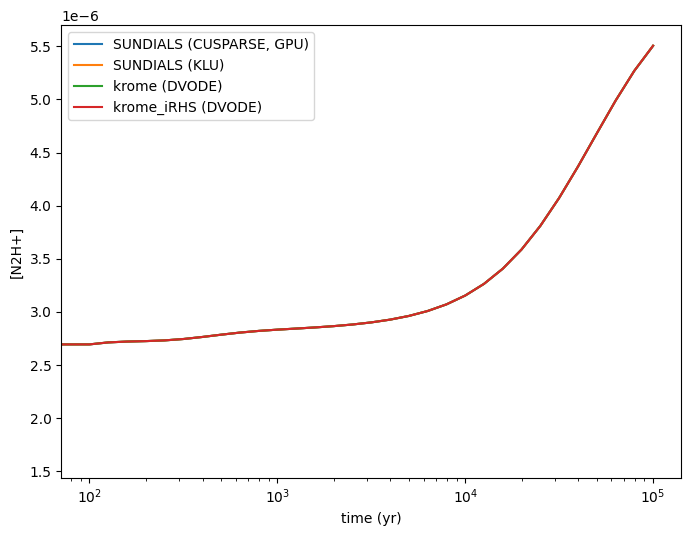

In [43]:
plt.clf()
fig, ax = plt.subplots(facecolor="w")

cellidx = 1024

targetspec = ["oH2", "pH2", "N2H+"]

for spec in targetspec:
    plt.clf()
    fig, ax = plt.subplots()

    naunet_specidx = naunet_species.index(spec) + 2
    krome_specidx = krome_species.index(spec) + 2

    for i, (sname, method) in enumerate(zip(evolsources, methods)):
        cellndata = evoldata[i][cellidx::4096]
        time = cellndata[:, 1]

        specidx = naunet_specidx if "naunet" in sname else krome_specidx
        specevol = cellndata[:, specidx]

        ax.plot(time, specevol, label=method);
        # print(celldata[:, specidx])

    ax.set_xlabel("time (yr)");
    ax.set_ylabel(f"[{spec}]");
    ax.set_xscale("log");

    ax.legend();

<Figure size 800x600 with 0 Axes>

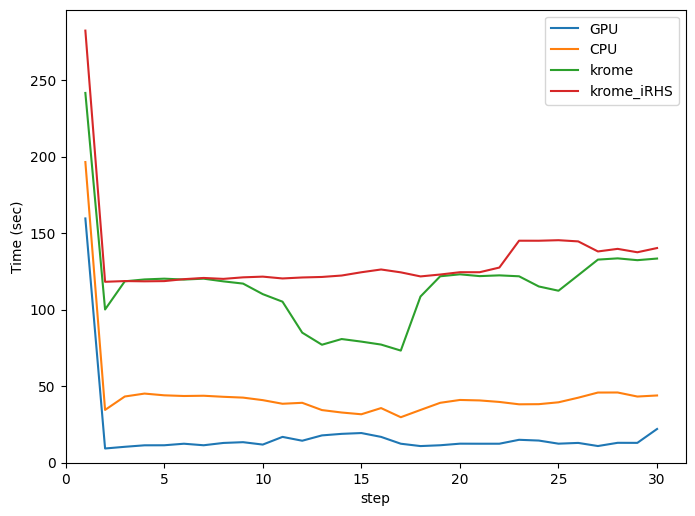

In [17]:
plt.clf()
fig, ax = plt.subplots(facecolor="w")

for i, (sname, method) in enumerate(zip(perfsources, methods)):
    walltime = timedata[i][:30]

    ax.plot(np.arange(len(walltime))+1, walltime, label=method);

    ax.set_xlabel("step");
    ax.set_ylabel("Time (sec)");

ax.set_xlim(left=0);
ax.set_ylim(bottom=0);
ax.legend();


In [24]:
methods = [
    "SUNDIALS (CUSPARSE, GPU)",
    "SUNDIALS (KLU)",
    "Boost (Odeint)",
    "krome (DVODE)",
    "krome_iRHS (DVODE)",
]

evolsources = [
    "naunet_deuterium_gpu2/build/test/evolution_singlegrid.txt",
    "naunet_deuterium_cpu/build/test/evolution_singlegrid.txt",
    "naunet_deuterium_odeint/build/test/evolution_singlegrid.txt",
    "benchmark_data/deuterium/krome/singlegrid/RHS/evolution.dat",
    "benchmark_data/deuterium/krome/singlegrid/iRHS/evolution.dat",
]

perfsources = [
    "naunet_deuterium_gpu2/build/test/time_singlegrid.txt",
    "naunet_deuterium_cpu/build/test/time_singlegrid.txt",
    "naunet_deuterium_odeint/build/test/time_singlegrid.txt",
    "benchmark_data/deuterium/krome/singlegrid/RHS/time.txt",
    "benchmark_data/deuterium/krome/singlegrid/iRHS/time.txt",
]

evoldata = [np.loadtxt(s) for s in evolsources]
timedata = [np.loadtxt(s) for s in perfsources]


<ipython-input-37-b14cd010e593>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"/home/cjhsu/benchmarkfig/{spec}.png", frameon=True, transparent=False)
<ipython-input-37-b14cd010e593>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"/home/cjhsu/benchmarkfig/{spec}.png", frameon=True, transparent=False)
<ipython-input-37-b14cd010e593>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"/home/cjhsu/benchmarkfig/{spec}.png", frameon=True, transparent=False)


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

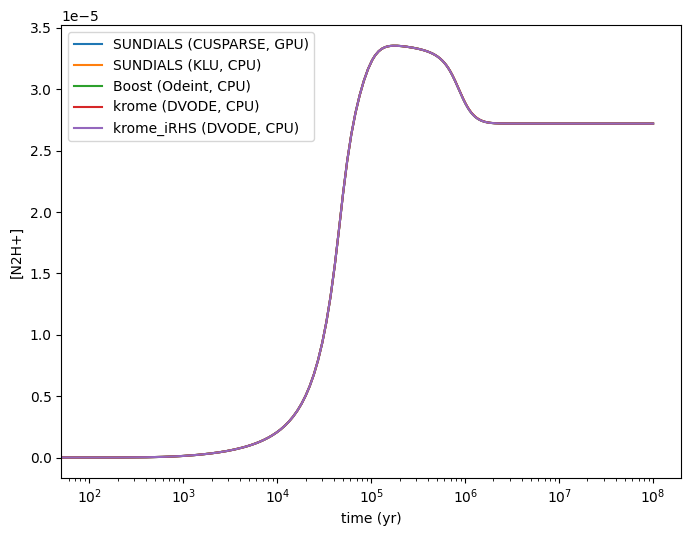

In [37]:
cellidx = 1024
targetspec = ["oH2", "pH2", "N2H+"]

for spec in targetspec:
    plt.clf()
    fig, ax = plt.subplots(facecolor="w")

    naunet_specidx = naunet_species.index(spec) + 1
    krome_specidx = krome_species.index(spec) + 1

    for i, (sname, method) in enumerate(zip(evolsources, methods)):
        celldata = evoldata[i]
        time = celldata[:, 0]

        specidx = naunet_specidx if "naunet" in sname else krome_specidx
        specevol = celldata[:, specidx]
        if "krome" in sname:
            specevol = specevol * 1e5

        ax.plot(time, specevol, label=method);
        # print(celldata[:, specidx])

    ax.set_xlabel("time (yr)");
    ax.set_ylabel(f"[{spec}]");
    ax.set_xscale("log");

    ax.legend();


<Figure size 800x600 with 0 Axes>

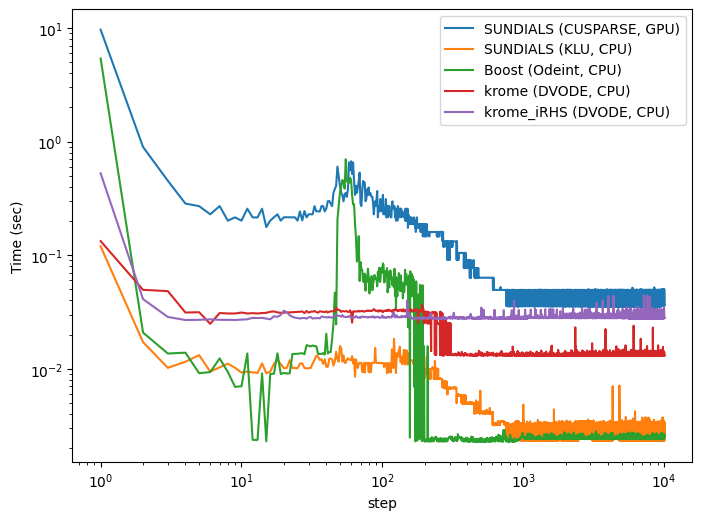

In [32]:
plt.clf()
fig, ax = plt.subplots(facecolor="w")

for i, (sname, method) in enumerate(zip(perfsources, methods)):
    walltime = timedata[i]

    ax.plot(np.arange(len(walltime))+1, walltime, label=method);

    ax.set_xlabel("step");
    ax.set_ylabel("Time (sec)");

# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
ax.set_xscale("log");
ax.set_yscale("log");
ax.legend();